# Exploring the __SLICS-HR__ particle data
notebook by _Alex Malz (GCCL@RUB)_, (add your name here)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Read in data

Download one of the 64 nodes $\times$ 20 redshifts files at each redshift from [here](http://cuillin.roe.ac.uk/~jharno/SLICS/SLICS_HR/LOS1/) to start.
I chose file 27 at $z=0.042$ for this example.
Read in from binary float(4) format and throw out first 12 entries as unwanted header information.

In [ ]:
z_str = '0.042'
fn_base = 'xv'
fn_index = 27
fn_ext = '.dat'
fn = z_str + fn_base + str(fn_index) + fn_ext

In [ ]:
dt_each = 'f' + str(4)
dt = np.dtype([('x', dt_each), ('y', dt_each), ('z', dt_each), ('vx', dt_each), ('vy', dt_each), ('vz', dt_each)])

In [ ]:
with open(fn, 'rb') as f1:
    raw_data = np.fromfile(f1, dtype=dt)

In [ ]:
raw_data[:10]

In [ ]:
loc_data = pd.DataFrame(data=raw_data[2:], columns=['x', 'y', 'z', 'vx', 'vy', 'vz'])

In [ ]:
loc_data[:10]

## Convert to physical units

The particle data starts out in simulation units relative to the per-node subvolume and needs to be converted to physical units in the space of all subvolumes before the whole volume can be considered.
Note that the conversion below makes sense for `x`, `y`, and `z` but not for `vx`, `vy`, and `vz`.

In [ ]:
# number of MPI tasks per dimension
nodes_dim = 4

# subvolume size
ncc = 768

# volume size
rnc = 3072.

In [ ]:
for k1 in range(1, nodes_dim+1):
    for j1 in range(1, nodes_dim+1):
        for i1 in range(1, nodes_dim+1):
            if fn_index == (i1 - 1) + (j1 - 1) * nodes_dim + (k1 - 1) * nodes_dim ** 2:
                print('found index '+str(fn_index)+' at '+str((i1, j1, k1)))
                node_coords = {'x': i1 - 1, 'y': j1 - 1, 'z': k1 - 1}
                print(node_coords)

In [ ]:
# shift data
glob_data = loc_data
for col in ['x', 'y', 'z']:
    glob_data[col] = np.remainder(loc_data[col] + node_coords[col] * ncc, rnc)
    assert(max(glob_data[col] <= rnc))

In [ ]:
glob_data[:10]

In [ ]:
# convert to Mpc/h
phys_data = glob_data * 505. / 3072.

In [ ]:
phys_data[:10]

## Examine the precomputed 2PCF

Download the 2PCF at several redshifts [here](https://drive.google.com/drive/folders/1eGlAO_wl9h0xiXiTMKV_m7h9YCRhDHP_?usp=sharing).

Note that the data is $\Delta^{2}(k)$, not the more familiar (to me) $\mathcal{P}(k)$.  (A reminder of the relationship between them can be found [here](http://universe-review.ca/R05-04-powerspectrum.htm), particularly in [this figure](http://universe-review.ca/I02-20-correlate1b.png).)

In [10]:
pk = np.genfromtxt('0.042ngpps_new.dat_LOS1').T

Text(0, 0.5, '$\\Delta^2(k)$')

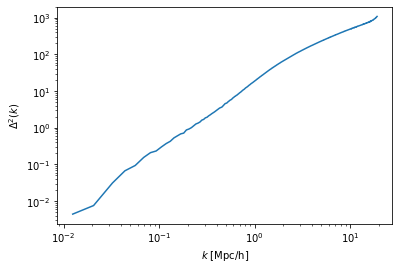

In [24]:
plt.plot(pk[0], pk[1])
plt.semilogx()
plt.semilogy()
plt.xlabel(r'$k$ [Mpc/h]')
plt.ylabel(r'$\Delta^2(k)$')

# Next steps

Ultimately, we will need to calculate the 2 and 3+ point correlation functions of the particle data.
Because the data is split into 64 files per redshift, we also need a way to combine the positional information from each file to get coherent correlation functions.
We may be able to more easily accomplish both goals if we first smooth the data using a Fourier-space basis like wavelets.

## combine particle data from multiple files

## calculate the N-point correlation functions